# Standards CE 1-1,2,3
1. I can sketch the "curly" electric field associated with an arbitrary, changing magnetic field.
2. I can calculate the magnitude of the electric field associated with a region with a uniform, changing magnetic field at an arbitrary location in that region .
3. I can estimate the direction of the electric field associated with a region with a uniform, changing magnetic field at an arbitrary location in that region.

In [2]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
%matplotlib widget 

In [3]:
class MagneticField:
    """Class to calculate and visualize the dipole magnetic field."""

    def __init__(self, moment_strength, dipole_center, grid_size=(6, 8, 8)):
        """Initialize the magnetic field parameters."""
        self.mu_0 = 4 * np.pi * 1e-7  # Permeability of free space (T·m/A)
        self.m = np.array([moment_strength, 0, 0])  # Magnetic moment along x-axis
        self.dipole_center = np.array(dipole_center)  # Center of the dipole
        self.grid_size = grid_size  # Number of points in (x, y, z)

    def compute_field(self, x, y, z):
        """Computes the dipole magnetic field vector at a given point."""
        r_vec = np.array([x, y, z]) - self.dipole_center  # Shift coordinates by dipole center
        r = np.linalg.norm(r_vec)  # Distance from dipole

        if r == 0:  # Avoid singularity
            return np.array([0, 0, 0])

        r_hat = r_vec / r  # Unit vector
        term1 = 3 * np.dot(self.m, r_hat) * r_hat
        B = (self.mu_0 / (4 * np.pi)) * (term1 - self.m) / (r**3)

        return B  # No artificial scaling applied

    def generate_field_grid(self, bounds=(-3, 3, -2, 2, -2, 2)):
        """Generates a grid of points and computes the magnetic field at each point."""
        x_min, x_max, y_min, y_max, z_min, z_max = bounds
        x = np.linspace(x_min, x_max, self.grid_size[0])
        y = np.linspace(y_min, y_max, self.grid_size[1])
        z = np.linspace(z_min, z_max, self.grid_size[2])
        X, Y, Z = np.meshgrid(x, y, z)

        Bx, By, Bz = np.zeros_like(X), np.zeros_like(Y), np.zeros_like(Z)
        B_magnitude = np.zeros_like(X)  # Store magnitudes for scaling

        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                for k in range(X.shape[2]):
                    B = self.compute_field(X[i, j, k], Y[i, j, k], Z[i, j, k])
                    Bx[i, j, k], By[i, j, k], Bz[i, j, k] = B
                    B_magnitude[i, j, k] = np.linalg.norm(B)  # Store magnitude

        return X, Y, Z, Bx, By, Bz, B_magnitude

    def plot_field(self, ax, bounds=(-3, 3, -2, 2, -2, 2)):
        """Plots the magnetic field vectors in 3D."""
        X, Y, Z, Bx, By, Bz, B_magnitude = self.generate_field_grid(bounds)
        
        # Normalize the vectors by their magnitudes (to scale properly)
        B_magnitude = np.clip(B_magnitude, 1e-3, np.max(B_magnitude))  # Clip to avoid division by zero
        
        # Scale the vectors by their magnitudes for visualization
        Bx_scaled = Bx / B_magnitude
        By_scaled = By / B_magnitude
        Bz_scaled = Bz / B_magnitude
        
        # Plot the magnetic field vectors (quiver plot)
        ax.quiver(X, Y, Z, Bx_scaled, By_scaled, Bz_scaled, color='blue', alpha=0.6)

        # Plot the magnetic moment as a single vector (use a red color)
        ax.quiver(self.dipole_center[0], self.dipole_center[1], self.dipole_center[2],
                  self.m[0], self.m[1], self.m[2], color='red', length=.1, linewidth=2, label="Magnetic Moment")

        # Mark the dipole center
        ax.scatter(*self.dipole_center, color='red', s=50, label='Dipole Center')


## Sketching System
Let's consider the use case of the magnet moving away from origin with velocity v, in which we just plug in some basic numbers.

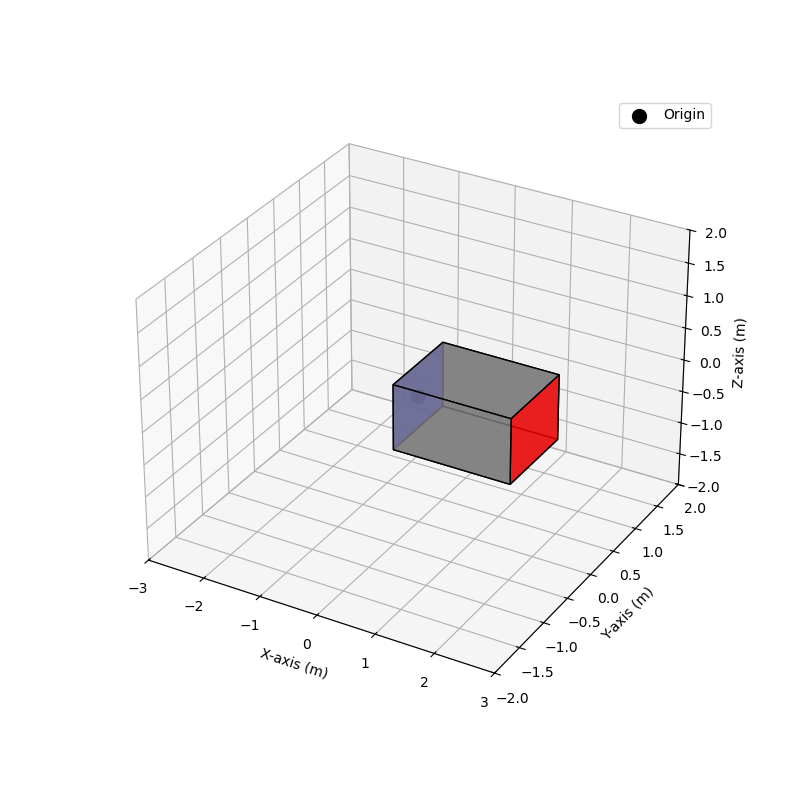

In [4]:
def draw_rectangular_magnet(ax, center, size):
    """Draws a rectangular bar magnet centered on an axis."""
    
    cx, cy, cz = center
    dx, dy, dz = size
    
    # Shift so the magnet is centered along x-axis
    x_start = cx - dx / 2
    y_start = cy - dy / 2
    z_start = cz - dz / 2
    
    # Define the 8 corner points of the rectangle
    corners = np.array([
        [x_start, y_start, z_start], [x_start + dx, y_start, z_start], 
        [x_start + dx, y_start + dy, z_start], [x_start, y_start + dy, z_start],  # Bottom face
        [x_start, y_start, z_start + dz], [x_start + dx, y_start, z_start + dz], 
        [x_start + dx, y_start + dy, z_start + dz], [x_start, y_start + dy, z_start + dz]  # Top face
    ])
    
    # Define the 6 faces with their corner indices
    faces = [
        [corners[i] for i in [0, 1, 2, 3]],  # Bottom
        [corners[i] for i in [4, 5, 6, 7]],  # Top
        [corners[i] for i in [0, 1, 5, 4]],  # Side 1
        [corners[i] for i in [2, 3, 7, 6]],  # Side 2
        [corners[i] for i in [1, 2, 6, 5]],  # North pole (Red)
        [corners[i] for i in [0, 3, 7, 4]]   # South pole (Blue)
    ]
    
    # Assign colors (gray for body, red/blue for poles)
    face_colors = ['gray', 'gray', 'gray', 'gray', 'red', 'blue']
    
    # Create the 3D polygon collection
    poly3d = Poly3DCollection(faces, alpha=0.8, linewidths=1, edgecolors='k')
    poly3d.set_facecolor(face_colors)
    
    ax.add_collection3d(poly3d)


###############
# Setup figure
###############

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Set limits
ax.set_xlim([-3, 3])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])

# Label Axes
ax.set_xlabel("X-axis (mm)")
ax.set_ylabel("Y-axis (mm)")
ax.set_zlabel("Z-axis (mm)")

# Draw magnet centered on the x-axis
draw_rectangular_magnet(ax, center=(1, 0, 0), size=(2, 1, 1))

# Add a dot at the origin
ax.scatter(0, 0, 0, color='black', s=100, label='Origin')

# Add legend
ax.legend()

# Show plot
plt.show()

## Add B-Field

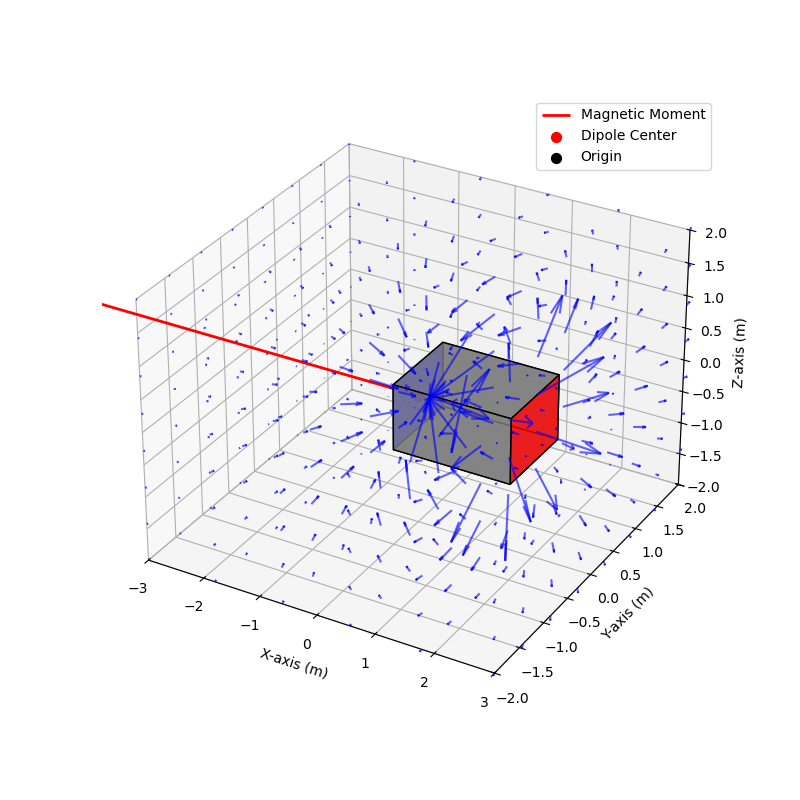

In [7]:
###############
# Setup figure
###############

# Setup figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Set limits
ax.set_xlim([-3, 3])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])

# Label Axes
ax.set_xlabel("X-axis (mm)")
ax.set_ylabel("Y-axis (mm)")
ax.set_zlabel("Z-axis (mm)")

# Draw magnet centered on the x-axis
draw_rectangular_magnet(ax, center=(1, 0, 0), size=(2, 1, 1))

# Create and plot magnetic field
field = MagneticField(moment_strength=10000, dipole_center=(1,0,0))
field.plot_field(ax)

# Add a dot at the origin
ax.scatter(0, 0, 0, color='black', s=50, label='Origin')

# Add legend
ax.legend()

# Show plot
plt.show()

## Move the Magnet
Away from the origin

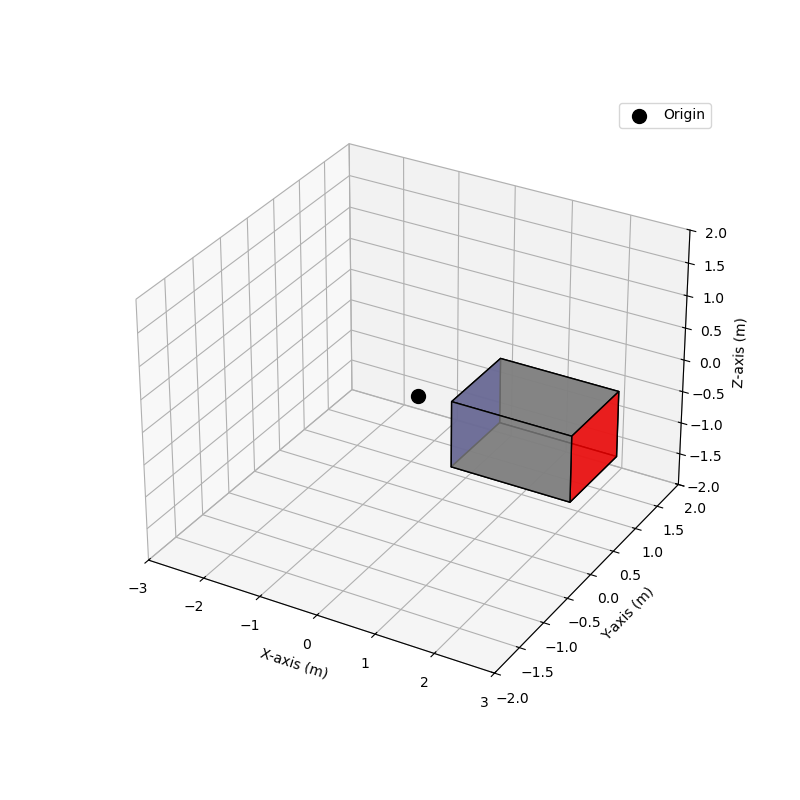

In [8]:
def draw_rectangular_magnet(ax, center, size):
    """Draws a rectangular bar magnet centered on an axis."""
    
    cx, cy, cz = center
    dx, dy, dz = size
    
    # Shift so the magnet is centered along x-axis
    x_start = cx - dx / 2
    y_start = cy - dy / 2
    z_start = cz - dz / 2
    
    # Define the 8 corner points of the rectangle
    corners = np.array([
        [x_start, y_start, z_start], [x_start + dx, y_start, z_start], 
        [x_start + dx, y_start + dy, z_start], [x_start, y_start + dy, z_start],  # Bottom face
        [x_start, y_start, z_start + dz], [x_start + dx, y_start, z_start + dz], 
        [x_start + dx, y_start + dy, z_start + dz], [x_start, y_start + dy, z_start + dz]  # Top face
    ])
    
    # Define the 6 faces with their corner indices
    faces = [
        [corners[i] for i in [0, 1, 2, 3]],  # Bottom
        [corners[i] for i in [4, 5, 6, 7]],  # Top
        [corners[i] for i in [0, 1, 5, 4]],  # Side 1
        [corners[i] for i in [2, 3, 7, 6]],  # Side 2
        [corners[i] for i in [1, 2, 6, 5]],  # North pole (Red)
        [corners[i] for i in [0, 3, 7, 4]]   # South pole (Blue)
    ]
    
    # Assign colors (gray for body, red/blue for poles)
    face_colors = ['gray', 'gray', 'gray', 'gray', 'red', 'blue']
    
    # Create the 3D polygon collection
    poly3d = Poly3DCollection(faces, alpha=0.8, linewidths=1, edgecolors='k')
    poly3d.set_facecolor(face_colors)
    
    ax.add_collection3d(poly3d)


###############
# Setup figure
###############

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Set limits
ax.set_xlim([-3, 3])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])

# Label Axes
ax.set_xlabel("X-axis (m)")
ax.set_ylabel("Y-axis (m)")
ax.set_zlabel("Z-axis (m)")

# Draw magnet centered on the x-axis
draw_rectangular_magnet(ax, center=(2, 0, 0), size=(2, 1, 1))

# Add a dot at the origin
ax.scatter(0, 0, 0, color='black', s=100, label='Origin')

# Add legend
ax.legend()

# Show plot
plt.show()

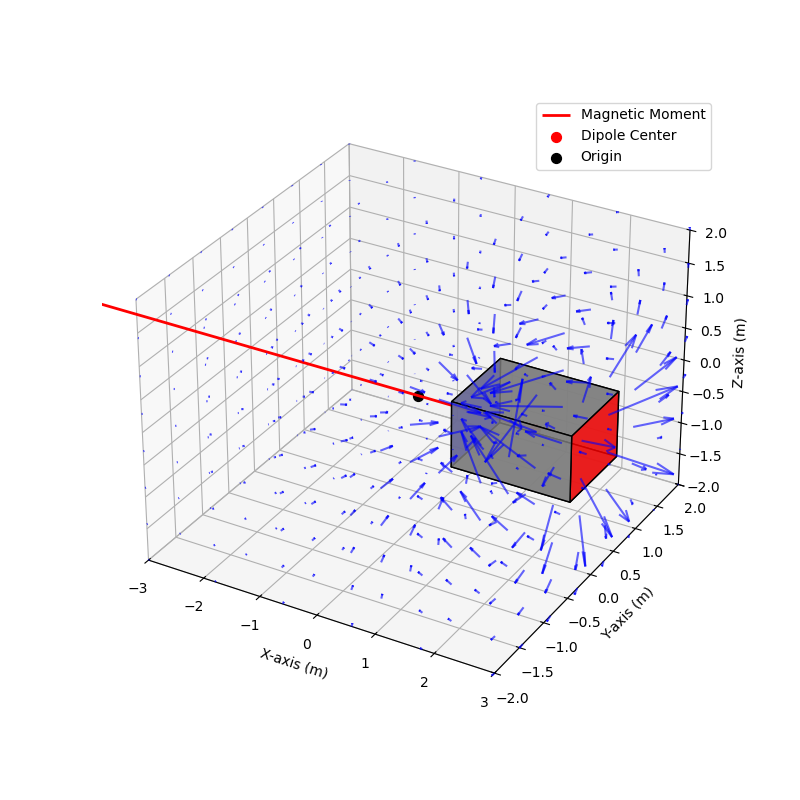

In [9]:
###############
# Setup figure
###############

# Setup figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Set limits
ax.set_xlim([-3, 3])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])

# Label Axes
ax.set_xlabel("X-axis (m)")
ax.set_ylabel("Y-axis (m)")
ax.set_zlabel("Z-axis (m)")

# Draw magnet centered on the x-axis
draw_rectangular_magnet(ax, center=(2, 0, 0), size=(2, 1, 1))

# Create and plot magnetic field
field = MagneticField(moment_strength=10000, dipole_center=(2,0,0))
field.plot_field(ax)

# Add a dot at the origin
ax.scatter(0, 0, 0, color='black', s=50, label='Origin')

# Add legend
ax.legend()

# Show plot
plt.show()